In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import sys
from IPython.display import display, Markdown
from ipywidgets import (
    interactive,
    Select,
    Dropdown,
    FloatRangeSlider,
    Button,
    VBox,
    HBox,
    Tab,
    ToggleButton,
    BoundedIntText,
)
%matplotlib notebook

In [2]:
%matplotlib notebook

In [3]:
sys.path.append(".")
from plotter import scatter_plot_color, is_datetime

In [4]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]],
    columns=iris["feature_names"] + ["target"],
)
converter = {0: "setosa", 1: "versicolor", 2: "virginica"}
df_iris["target"] = df_iris["target"].replace(converter)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# Create all widgets

# filtering the DataFrame
sliders = {}
for col in df_iris.columns:
    if df_iris[col].dtype == "float":
        minn = df_iris[col].min()
        maxx = df_iris[col].max()
        range_slider = FloatRangeSlider(
            value=[minn, maxx],
            min=minn,
            max=maxx, 
            step=0.1,
            description=col,
            readout_format='.1f',
        )
        sliders[col] = range_slider
        
# Wich columns to plot
xas_widget = Select(
    options=list(df_iris.columns),
    description='x-axis',
    value=df_iris.columns[0]
)
yas_widget = Select(
    options=list(df_iris.columns),
    description='y-axis',
    value=df_iris.columns[1]
)
color_widget = Dropdown(
    options=list(df_iris.columns), description='coloring', value='target'
)    

plot_button = Button(
    description='Plot',
)

grid_button = ToggleButton(
    value=False,
    description='Grid',
    icon='check'
)

marker_size_input = BoundedIntText(
    value=20,
    min=1,
    max=50,
    step=5,
    description='Marker size',
    disabled=False,
)


# Create the tabs to interact with the widgets
tab2 = VBox(children=list(sliders.values()))
tab1 = HBox(children=[
    VBox(children=[xas_widget, yas_widget, color_widget]),
    VBox(children=[grid_button, marker_size_input]),
])
    
tab = Tab(children=[tab1, tab2])
tab.set_title(0, 'plot')
tab.set_title(1, 'filtering')
    

In [16]:

def update_plot(**kwargs):
    f, ax = plt.subplots()
    plt.ion()
    xas = xas_widget.value
    yas = yas_widget.value
    coloring = color_widget.value
    grid = grid_button.value
    markersize = marker_size_input.value
    df_copy = df_iris.copy()
    
    for col in sliders:
        minn = sliders[col].value[0]
        maxx = sliders[col].value[1]
        filter_upper = df_copy[col] <= maxx
        filter_downer = df_copy[col] >= minn
        df_copy = df_copy[filter_upper]
        df_copy = df_copy[filter_downer]
    
    scatter_plot_color(
        f,
        ax,
        df_copy,
        xas,
        yas,
        coloring,
        markersize,
    )
    
    ax.grid(grid)
    
# interactive(
#     update_plot,
#     xas=xas_widget,
#     yas=yas_widget,
#     coloring=color_widget
# )

@plot_button.on_click
def plot_on_click(b):
    update_plot()

<IPython.core.display.Javascript object>


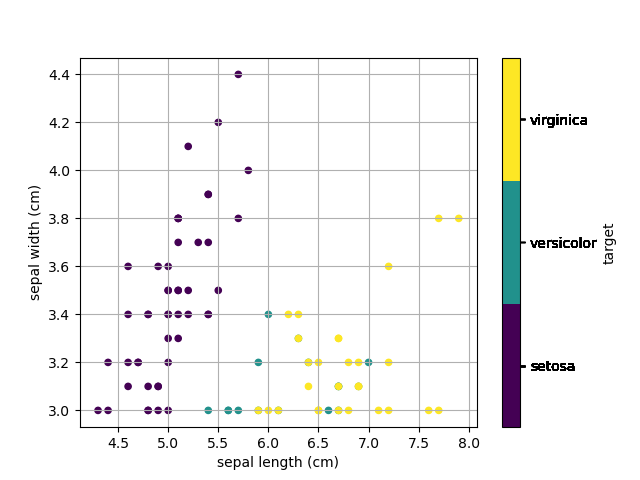

<IPython.core.display.Javascript object>


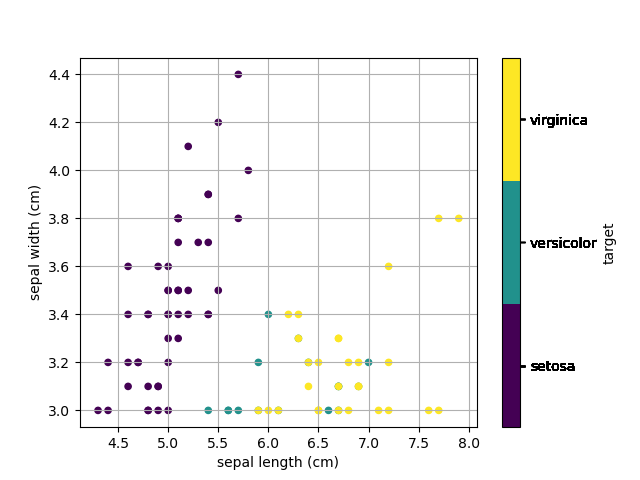

<IPython.core.display.Javascript object>


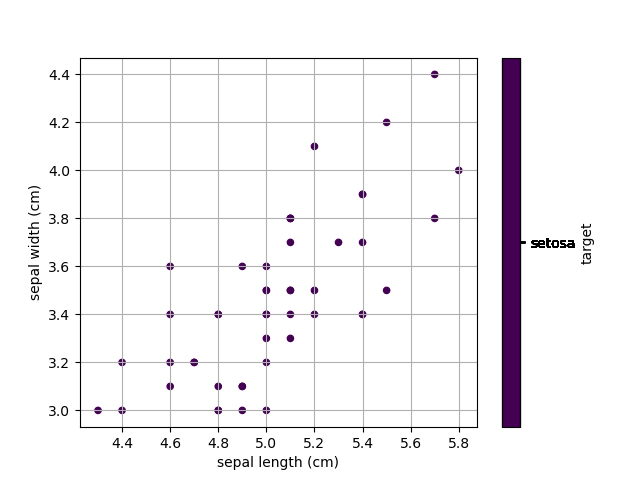

/tmp/ipykernel_35547/4047616480.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[filter_downer]


<IPython.core.display.Javascript object>


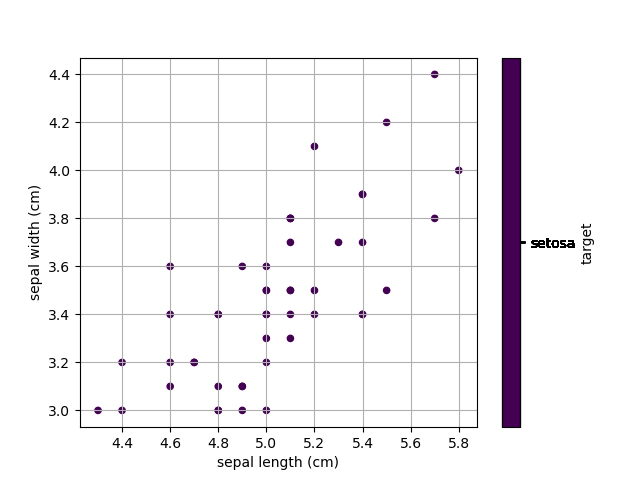

<IPython.core.display.Javascript object>


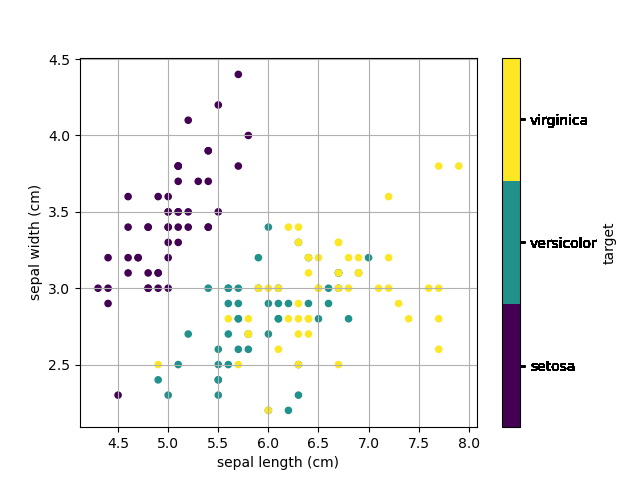

<IPython.core.display.Javascript object>


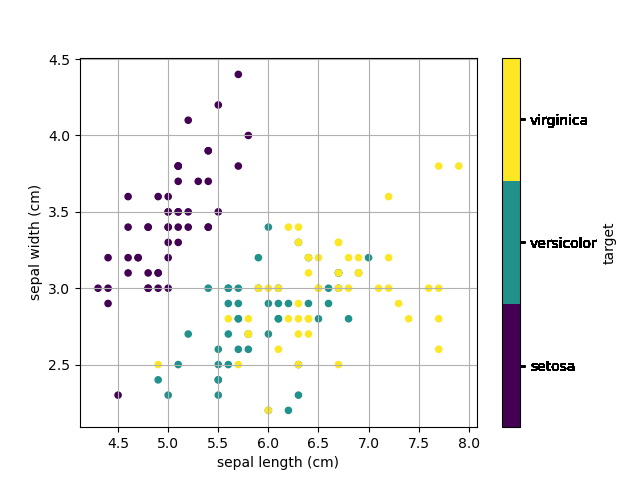

<IPython.core.display.Javascript object>


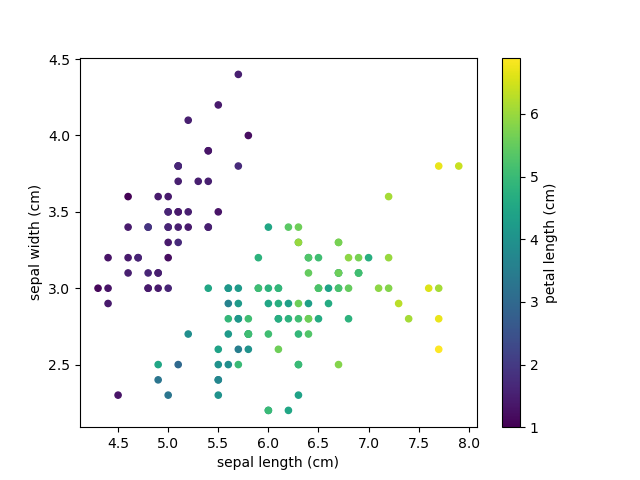

<IPython.core.display.Javascript object>


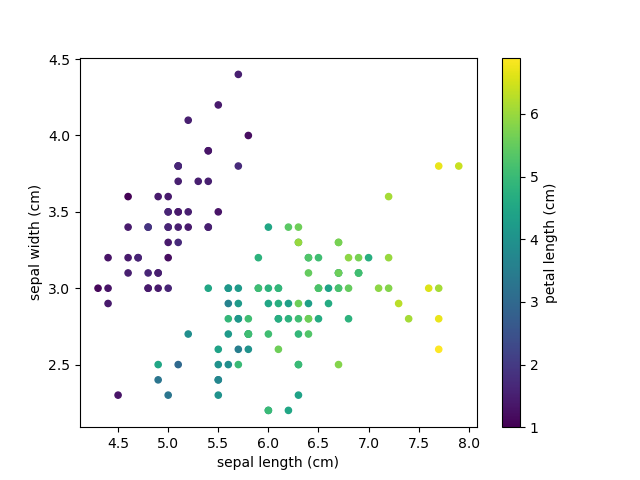

In [17]:
VBox(children=[tab, plot_button])

In [ ]:
sliders["alcohol"].value[0]

# Time series

In [ ]:
df = pd.read_csv('http://bit.ly/30iosS6', parse_dates=['date'])
df.head()

In [ ]:
df.plot()

In [ ]:
# Make an updateable plot structure
xas_widget = Dropdown(
    options=list(df.columns),
    description='x-axis',
    value=df.columns[0]
)
yas_widget = Dropdown(
    options=list(df.columns),
    description='y-axis',
    value=df.columns[1]
)
color_widget = Dropdown(
    options=list(df.columns),
    description='coloring',
    value=df.columns[1]
)

def update_plot(**kwargs):
    f, ax = plt.subplots()
    plt.ion()
    xas = xas_widget.value
    yas = yas_widget.value
    coloring = color_widget.value
    scatter_plot_color(
        f,
        ax,
        df,
        xas,
        yas,
        coloring,
    )
    
interactive(
    update_plot,
    xas=xas_widget,
    yas=yas_widget,
    coloring=color_widget
)

In [ ]:

tab1